# Titanic Survivals
## Python Demo: Data Analysis with Machine Learning

<br><br>
This demo code will illustrate solving a typical machine learning task.
Based on data about all <a href = "https://en.wikipedia.org/wiki/RMS_Titanic">Titanic</a> passangers, both those that have survived and those that have not survived the tragic and the biggest passanger ship crash in the history (1912), we will make a model, which can be used for prediction of future and imaginery survivals.
Please, note, that this are not just numbers, but numbers, associated with real people's destiny!


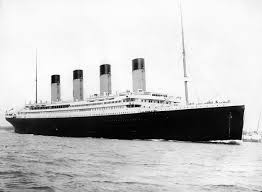

We will implement the following procedure:
1. Prepare the environment by importing the major libraries, which contain modules and functions we will need.
2. Get the available data
3. Explore the data to get to know what it contains.
4. Clean the data, so it can be easier analysed
5. Chose a method for analysis
6. Build an analytical model of the data applying the method above
7. Validate the model with test data 
8. Use the model for prediction of new data

### Import the necessary Python libraries

In [27]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import matplotlib for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline

# for generating random numbers
import random

# the most important library for machine learning algorithms
from sklearn import datasets, svm, tree, preprocessing, metrics

### Get the data 
In this demo we will use an excel file with the original data. In many other cases we can only find plain text or csv files.

In [7]:
# read the file into a Pandas data frame
df = pd.read_csv('TitanicData.csv', index_col=None, na_values=['NA'])

In [8]:
# see the size
df.shape

(1310, 14)

In [9]:
# see which are the attribute labels
list(df)

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [10]:
# get an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [11]:
# see the first five records
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Explore the data

In [13]:
# see the types of the attributes
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [14]:
# get some insights of the value scope
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<Axes: xlabel='embarked'>

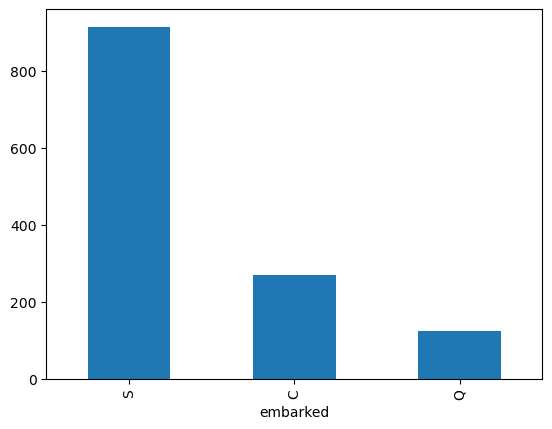

In [15]:
# Non-numeric data is not included in the statistic above, but can be plotted
df['embarked'].value_counts().plot(kind='bar')

<Axes: xlabel='survived'>

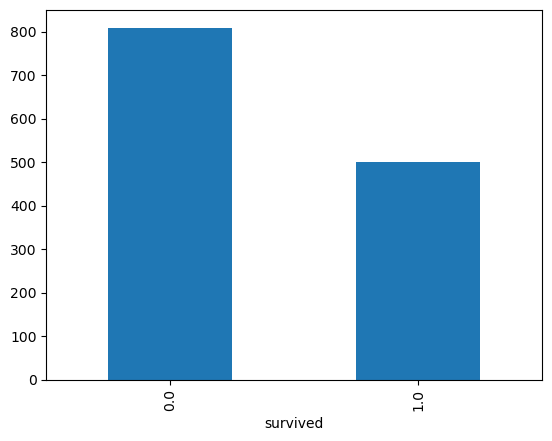

In [24]:
# Numeric data can also be plotted 
df['survived'].value_counts().plot(kind='bar')

Incredibly low % of survivals: 38% <br>
Titanic was only carrying 20 lifeboats for 1317 passengers and 885 crew members aboard!

#### Social status

In [150]:
# Did the social class matter?
social = df.groupby('pclass').count()
social

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
pclass,,,,,,,,,,,,,
1.0,323,323,323,284,323,323,323,323,256,321,201,35,289
2.0,277,277,277,261,277,277,277,277,23,277,112,31,261
3.0,709,709,709,501,709,709,709,708,16,709,173,55,195


<Axes: xlabel='pclass'>

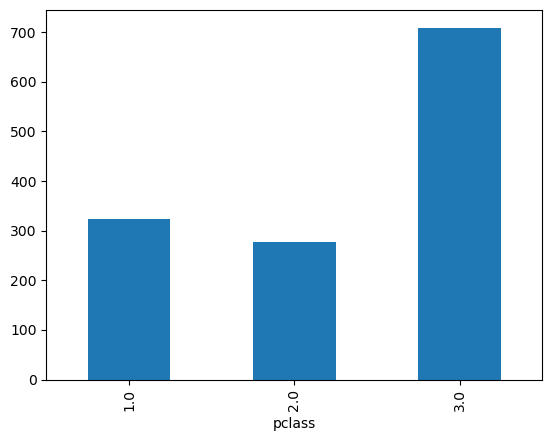

In [152]:
# plot
social['survived'].plot.bar()

#### Gender

In [155]:
# Did the gender matter?
gender = df.groupby(['survived', 'sex'])['name'].count()
gender

survived  sex   
0.0       female    127
          male      682
1.0       female    339
          male      161
Name: name, dtype: int64

<Axes: ylabel='name'>

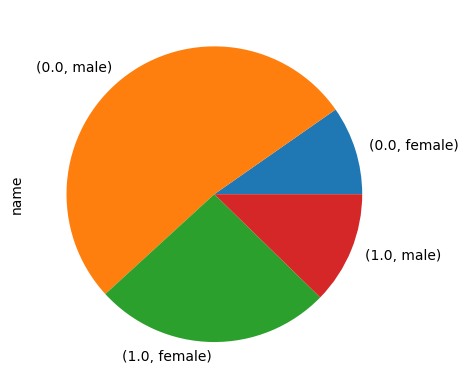

In [157]:
# plot
gender.plot.pie()

In [159]:
# gender by class
gender_by_class = df.groupby(['pclass','sex']).count()
gender_by_class

survived  name  age  sibsp  parch  ticket  fare  cabin  \
pclass sex                                                              
1.0    female       144   144  133    144    144     144   144    121   
       male         179   179  151    179    179     179   179    135   
2.0    female       106   106  103    106    106     106   106     13   
       male         171   171  158    171    171     171   171     10   
3.0    female       216   216  152    216    216     216   216      7   
       male         493   493  349    493    493     493   492      9   

               embarked  boat  body  home.dest  
pclass sex                                      
1.0    female       142   138     0        121  
       male         179    63    35        168  
2.0    female       106    86     1        104  
       male         171    26    30        157  
3.0    female       216    95     7         63  
       male         493    78    48        132

<Axes: xlabel='pclass,sex'>

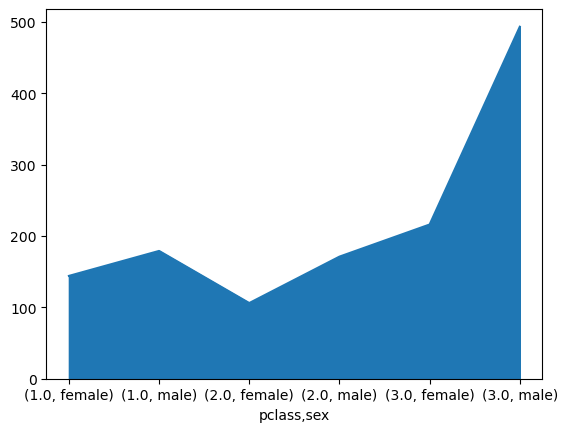

In [161]:
# plot
gender_by_class['survived'].plot.area()

#### Age

In [164]:
# We need to split it into groups (bins)
ranges = [0,10,20,30,40,50,60,70,80] 
age=df.groupby([(pd.cut(df.age, ranges))])['name'].count()
age

C:\Users\baban\AppData\Local\Temp\ipykernel_8592\2735412048.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age=df.groupby([(pd.cut(df.age, ranges))])['name'].count()


age
(0, 10]      86
(10, 20]    162
(20, 30]    361
(30, 40]    210
(40, 50]    132
(50, 60]     62
(60, 70]     27
(70, 80]      6
Name: name, dtype: int64

In [166]:
# average per range
age_by_gender=df.groupby([(pd.cut(df.age, ranges)), 'sex']).count()
age_by_gender

C:\Users\baban\AppData\Local\Temp\ipykernel_8592\1111495180.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_gender=df.groupby([(pd.cut(df.age, ranges)), 'sex']).count()


pclass  survived  name  age  sibsp  parch  ticket  fare  \
age      sex                                                               
(0, 10]  female      41        41    41   41     41     41      41    41   
         male        45        45    45   45     45     45      45    45   
(10, 20] female      68        68    68   68     68     68      68    68   
         male        94        94    94   94     94     94      94    94   
(20, 30] female     126       126   126  126    126    126     126   126   
         male       235       235   235  235    235    235     235   235   
(30, 40] female      75        75    75   75     75     75      75    75   
         male       135       135   135  135    135    135     135   135   
(40, 50] female      46        46    46   46     46     46      46    46   
         male        86        86    86   86     86     86      86    86   
(50, 60] female      25        25    25   25     25     25      25    25   
         male        37        37    37   37     37     37      37    37   
(60, 70] female       6         6     6    6      6      6       6     6   
         male        21        21    21   21     21     21      21    20   
(70, 80] female       1         1     1    1      1      1       1     1   
         male         5         5     5    5      5      5       5     5   

                 cabin  embarked  boat  body  home.dest  
age      sex                                             
(0, 10]  female      5        41    25     0         24  
         male        7        45    25     1         27  
(10, 20] female     16        68    45     3         47  
         male        9        94    14    10         51  
(20, 30] female     35       126    87     1         77  
         male       27       235    45    32        131  
(30, 40] female     34        74    58     2         55  
         male       31       135    32    30         86  
(40, 50] female     19        46    33     1         37  
         male       35        86    16    21         66  
(50, 60] female     19        25    22     1         24  
         male       17        37     7     8         34  
(60, 70] female      5         5     5     0          5  
         male       10        21     1     8         17  
(70, 80] female      1         1     1     0          1  
         male        2         5     1     2          3

<Axes: xlabel='age,sex'>

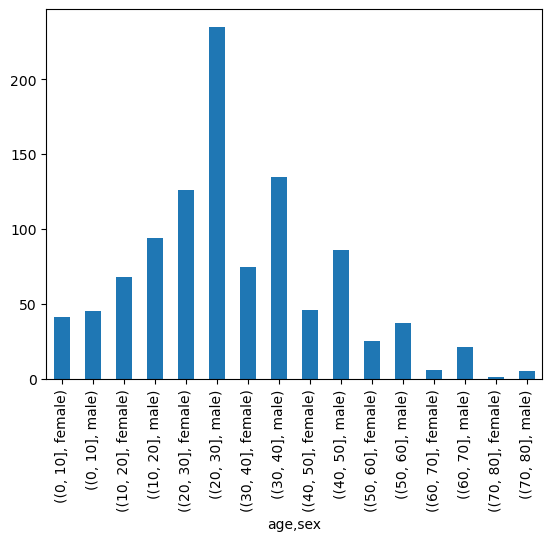

In [168]:
# plot
age_by_gender['survived'].plot.bar()

## Prepare the data for analysis

In [171]:
# count the missing values in each attribute
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [173]:
# fill the missing home destination with 'NA'
df["home.dest"] = df["home.dest"].fillna("NA")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [175]:
# remove most empty columns, which are not so informative
df = df.drop(['cabin','boat', 'body'], axis=1)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [177]:
# replace the missing age with the average age
mean_age = df.age.mean()
df['age'] = df['age'].fillna(mean_age)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [179]:
# see the current number of data
df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1310
sibsp        1309
parch        1309
ticket       1309
fare         1308
embarked     1307
home.dest    1310
dtype: int64

In [181]:
# see the current state of nill values
df.isnull().sum()

pclass       1
survived     1
name         1
sex          1
age          0
sibsp        1
parch        1
ticket       1
fare         2
embarked     3
home.dest    0
dtype: int64

In [183]:
# replace the  missing fare values with the average
df['fare'] = df['fare'].fillna(df.fare.mean())
df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1310
sibsp        1309
parch        1309
ticket       1309
fare         1310
embarked     1307
home.dest    1310
dtype: int64

In [185]:
# find the most used 'embarked' value
emb_mode = df.embarked.mode()
emb_mode

0    S
Name: embarked, dtype: object

In [187]:
# replace the missing embarked values with the mode
df['embarked'] = df['embarked'].fillna(emb_mode).iloc[0]
df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1310
sibsp        1309
parch        1309
ticket       1309
fare         1310
embarked     1310
home.dest    1310
dtype: int64

#### Transform data into numeric

As a preprocessing, we will convert the strings into integer keys, making it easier for the  algorithms to find patterns. 
- “Female” and “Male” are categorical values and will be converted to 0 and 1 respectively
- The “name”, “ticket”, and “home.dest” columns consist of non-categorical string values, which are difficult to use in our algorithm, so we will drop them from the data set

In [191]:
# define a function for transformation
def preprocessor(df):   
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    # sex {male, female} to {0, 1}
    processed_df['sex'] = le.fit_transform(df['sex'])
    
    # embarked {S, C, Q} => 3 values
    processed_df['embarked'] = le.fit_transform(df['embarked'])
    processed_df = processed_df.drop(['name','ticket','home.dest'], axis=1)
    return processed_df




In [193]:
# call the transformation function
dfp = preprocessor(df)

In [195]:
dfp.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,29.0000,0.0,0.0,211.3375,0
1,1.0,1.0,1,0.9167,1.0,2.0,151.5500,0
2,1.0,0.0,0,2.0000,1.0,2.0,151.5500,0
3,1.0,0.0,1,30.0000,1.0,2.0,151.5500,0
4,1.0,0.0,0,25.0000,1.0,2.0,151.5500,0


In [197]:
# see the current state of nill values
dfp.isnull().sum()

pclass      1
survived    1
sex         0
age         0
sibsp       1
parch       1
fare        0
embarked    0
dtype: int64

In [199]:
result = dfp[dfp['parch'].isnull()]
result

,pclass,survived,sex,age,sibsp,parch,fare,embarked
1309,NaN,NaN,2,29.881135,NaN,NaN,33.295479,0


In [201]:
dff = dfp.drop(index=1309)









### Train a model
1. Split the data into input and output
2. Split the data into train and test sets

In [204]:
# Split the data into input and output
X = dff.drop(['survived'], axis=1).values
y = dff['survived'].values

In [206]:
X


array([[  1.    ,   0.    ,  29.    , ...,   0.    , 211.3375,   0.    ],
       [  1.    ,   1.    ,   0.9167, ...,   2.    , 151.55  ,   0.    ],
       [  1.    ,   0.    ,   2.    , ...,   2.    , 151.55  ,   0.    ],
       ...,
       [  3.    ,   1.    ,  26.5   , ...,   0.    ,   7.225 ,   0.    ],
       [  3.    ,   1.    ,  27.    , ...,   0.    ,   7.225 ,   0.    ],
       [  3.    ,   1.    ,  29.    , ...,   0.    ,   7.875 ,   0.    ]])

In [208]:
y

array([1., 1., 0., ..., 0., 0., 0.])

In [210]:
# Split the data into train and test sets
# 80% of the dataset will be used for training and 20% will be used for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [212]:
# Select a method
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=3)

In [214]:
# Train a model
dt.fit (X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [216]:
# Validate the model
dt.score (X_test, y_test)

0.8244274809160306

The resulting value is the model accuracy. It means that the model correctly predicted the survival of this % of the test set. Not bad for start!

In [219]:
# Try another method
import sklearn.ensemble as ske
rf = ske.RandomForestClassifier(n_estimators=50)
rf.fit (X_train, y_train)
rf.score (X_test, y_test)

0.8015267175572519

In [221]:
# Try another method
import sklearn.ensemble as ske
gb = ske.GradientBoostingClassifier(n_estimators=50)
gb.fit (X_train, y_train)
gb.score (X_test, y_test)

0.8358778625954199

In [223]:
# Try combining methods
import sklearn.ensemble as ske

In [225]:
eclf = ske.VotingClassifier([('dt', dt), ('rf', rf), ('gb', gb)])
eclf.fit (X_train, y_train)
eclf.score (X_test, y_test)

0.8282442748091603

### Test the model for prediction
Once the model is trained we can use it to predict the survival of passengers in the test data set, and compare these to the known survival of each passenger using the original dataset.

#### Evaluate the performance with the test data

In [229]:
# Test the classifier with the test input data
prediction = dt.predict(X_test)

In [231]:
prediction

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0.

In [233]:
# Evaluate classifier performance
from sklearn.metrics import classification_report
class_names = ['Non-survival', 'Survival']
print("\n" + "#"*40)

print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, eclf.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, prediction, target_names=class_names))


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

Non-survival       0.85      0.90      0.87       634
    Survival       0.83      0.75      0.79       413

    accuracy                           0.84      1047
   macro avg       0.84      0.83      0.83      1047
weighted avg       0.84      0.84      0.84      1047

########################################


Classifier performance on test dataset

              precision    recall  f1-score   support

Non-survival       0.86      0.88      0.87       175
    Survival       0.75      0.71      0.73        87

    accuracy                           0.82       262
   macro avg       0.80      0.80      0.80       262
weighted avg       0.82      0.82      0.82       262



#### Evaluate the performance with new data

In [236]:
list(X_test)

[array([ 1.        ,  1.        , 29.88113451,  0.        ,  0.        ,
        30.5       ,  0.        ]),
 array([ 3.   ,  1.   , 25.   ,  1.   ,  0.   ,  7.775,  0.   ]),
 array([ 3.  ,  0.  , 18.  ,  0.  ,  1.  ,  9.35,  0.  ]),
 array([  1.,   0.,  28.,   3.,   2., 263.,   0.]),
 array([ 2. ,  1. ,  8. ,  0. ,  2. , 32.5,  0. ]),
 array([ 2.,  1., 39.,  0.,  0., 13.,  0.]),
 array([ 3.    ,  1.    , 29.    ,  0.    ,  0.    ,  7.8542,  0.    ]),
 array([ 3.    ,  1.    , 18.    ,  1.    ,  1.    , 20.2125,  0.    ]),
 array([ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.8958,  0.    ]),
 array([ 2.,  1., 34.,  1.,  0., 21.,  0.]),
 array([  1.   ,   0.   ,  38.   ,   0.   ,   0.   , 227.525,   0.   ]),
 array([ 3.    ,  0.    , 17.    ,  0.    ,  0.    ,  7.7333,  0.    ]),
 array([ 3.    ,  1.    , 14.    ,  4.    ,  1.    , 39.6875,  0.    ]),
 array([ 1.,  0., 19.,  0.,  0., 30.,  0.]),
 array([ 3.    ,  1.    , 22.    ,  0.    ,  0.    ,  7.7958,  0.    ]),
 array([ 3.  ,  

In [238]:
# Enter a new data set for a person
my_set1 = ([[1,0,29.00,0,0,211.3375,0]])
# my_set2 = ([[3.    ,   1.    ,  29.    , 0,   0.    ,   7.875 ,   0.   ]])
# my_set3 = ([[3.    ,   1.    ,  29.    , 0,   0.    ,   7.875 ,   0.   ]])

In [240]:
prediction = eclf.predict(my_set1)
prediction

array([1.])

## Reference
https://www.kaggle.com/c/titanic/data <br>
https://blog.socialcops.com/technology/data-science/machine-learning-python/<br>
https://www.youtube.com/watch?v=siEPqQsPLKA<br>